# Real Estate Valuation - Taiwan

The market historical data set of real estate valuation are collected from Sindian Dist., New Taipei City, Taiwan. 

## Goal of this notebook: 
The goal of this notebook is to predict the house price of unit area in Tawain (10000 New Taiwan Dollar/Ping, where Ping is a local unit, 1 Ping = 3.3 meter squared).

## Source data set: 
UCI Machine Learning Repository [here.](https://archive.ics.uci.edu/ml/datasets/Real+estate+valuation+data+set)

## Attribute Information:
The inputs are as follows:

- X1=the transaction date (for example, 2013.250=2013 March, 2013.500=2013 June, etc.) 
- X2=the house age (unit: year) 
- X3=the distance to the nearest MRT station (unit: meter) 
- X4=the number of convenience stores in the living circle on foot (integer) 
- X5=the geographic coordinate, latitude. (unit: degree) 
- X6=the geographic coordinate, longitude. (unit: degree) 

The output is as follow:
- Y= house price of unit area (10000 New Taiwan Dollar/Ping, where Ping is a local unit, 1 Ping = 3.3 meter squared) 

Reference [here.](https://archive.ics.uci.edu/ml/datasets/Real+estate+valuation+data+set)

## Load dataset...

In [1]:
from pandas import read_excel #Import the package read_excel from pandas
file_name = 'Real estate valuation data set.xlsx' # name of the excel file
df = read_excel(file_name)
df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1


In [2]:
df.shape

(414, 8)

In [3]:
df.describe() #Lets take an overview of the Stats 

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,207.500000,2013.148953,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,119.655756,0.281995,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,1.000000,2012.666667,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,104.250000,2012.916667,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,207.500000,2013.166667,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,310.750000,2013.416667,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,414.000000,2013.583333,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


#### Simplify the colums label for a better manipulation

In [4]:
df.columns.values

array(['No', 'X1 transaction date', 'X2 house age',
       'X3 distance to the nearest MRT station',
       'X4 number of convenience stores', 'X5 latitude', 'X6 longitude',
       'Y house price of unit area'], dtype=object)

In [5]:
#Lets remove the comment on the labels and keep only the Xs
df = df.rename(columns={'X1 transaction date': 'X1', 'X2 house age': 'X2', 
                        'X3 distance to the nearest MRT station': 'X3',
                        'X4 number of convenience stores': 'X4', 'X5 latitude':'X5', 
                        'X6 longitude' : 'X6'})

### Visualisation of the House Prices Dispersion

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

Text(0.5,1,'fig1: Distribution of the house price of unit area')

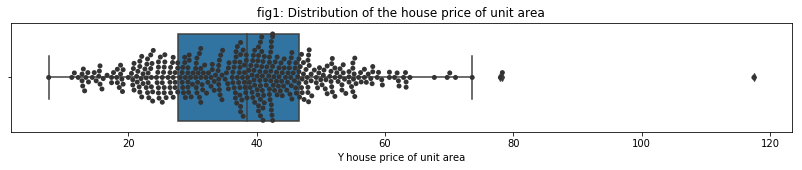

In [7]:
fig, ax = plt.subplots(figsize=(14,2)) 
sns.boxplot(df['Y house price of unit area'])
sns.swarmplot(df['Y house price of unit area'], color='.20')
plt.title('fig1: Distribution of the house price of unit area')

## Feature Engineering:

###  Lets verify if there is any Multicollinearity

Text(0.5,1,'fig2: Correlation Matrix between the Inputs')

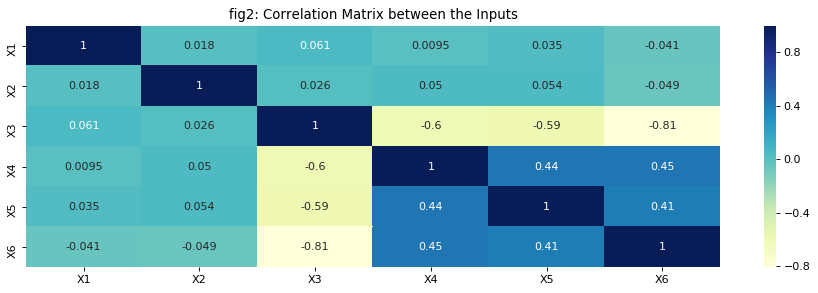

In [8]:
fig, ax = plt.subplots(figsize=(14,4), dpi=80)
sns.heatmap(df.loc[:, 'X1':'X6'].corr(), cmap="YlGnBu",annot=True)
plt.title('fig2: Correlation Matrix between the Inputs')

The  Correlation Matrix is showing a certain level of multicolinearity between all the inputs of the dataset. Specially the inputs X5 and X6 they are showing a high level of correlation. 
We will later on sort out which feature keep or drop for our prediction model. We will try to keep only the features that show less multicollinearity but the most collinearity with the dependant variable which in this case is Y the house price of unit area.

### Correlation between the Inputs and the dependant Variable (House Price)

Text(0,0.5,'Price per Unit')

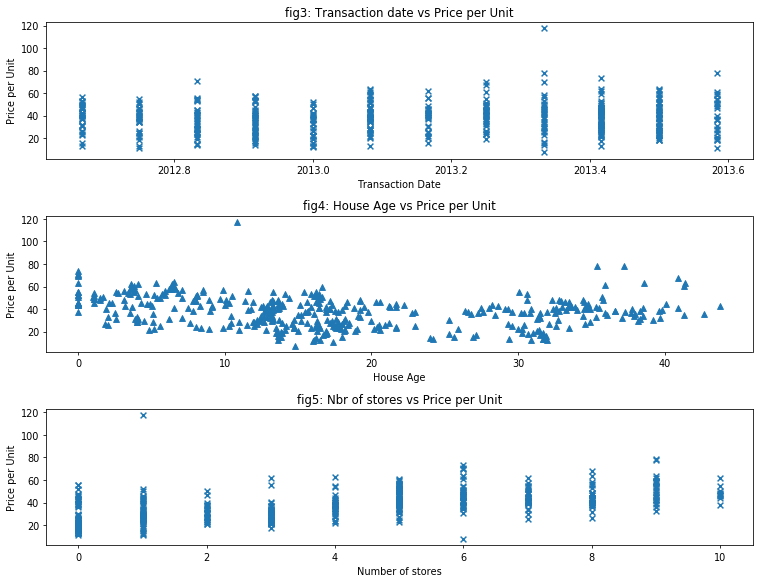

In [66]:
#Parameter of the graphs
fig = plt.figure(figsize=(11,8), dpi=70)
#Transaction date vs Price per Unit
plt.subplot(3,1,1)
x1 = df['X1']
y = df['Y house price of unit area'];plt.scatter(x1,y,marker='x')
plt.title('fig3: Transaction date vs Price per Unit');plt.xlabel('Transaction Date')
plt.ylabel('Price per Unit')
plt.tight_layout()
#House Age vs Price per Unit
plt.subplot(3,1,2)
x2 = df['X2']
y = df['Y house price of unit area'];plt.scatter(x2,y, marker='^')
plt.title('fig4: House Age vs Price per Unit');plt.xlabel('House Age')
plt.ylabel('Price per Unit')
plt.tight_layout()
#Nbr of stores vs Price per Unit
plt.subplot(3,1,3)
x4 = df['X4']
y = df['Y house price of unit area'];plt.scatter(x4,y, marker='x')
plt.title('fig5: Nbr of stores vs Price per Unit');plt.xlabel('Number of stores')
plt.ylabel('Price per Unit')

Looking at the fig3, fig4 and fig5, the inputs, transactions date X1, the House Age X2 and the number of convenience stores in the living circle X4 are showing no relationship with the house price of unit area. There is no pattern that can found explain a correlation between these 3 inputs and the dependant variable Y. All these 3 Inputs will no be relevant to our analysis therefore they will be dropped. 


Text(0,0.5,'Price per Unit')

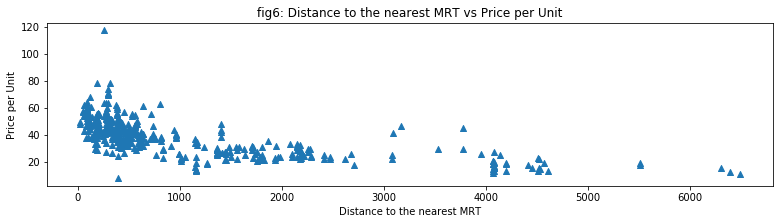

In [51]:
#Distance to the nearest MRT station vs Price per Unit
fig = plt.figure(figsize=(13,3)) 
#Data Gathering
x3 = df['X3']
y = df['Y house price of unit area']
plt.scatter(x3,y, marker='^')   #Data points
plt.title('fig6: Distance to the nearest MRT vs Price per Unit');plt.xlabel('Distance to the nearest MRT')
plt.ylabel('Price per Unit')

Looking at the fig6, it looks like more the house is near to the MRT station, the house price tends to be higher. This figure, shows a certain relationship between the distance to the nearest MRT station and the house price. The input X3 will be included to our analysis. 

In [14]:
#The location vs Price per Unit
#Data gathering
x5 = df['X5'] #Latitude
x6 = df['X6'] #Longitude
y = df['Y house price of unit area']

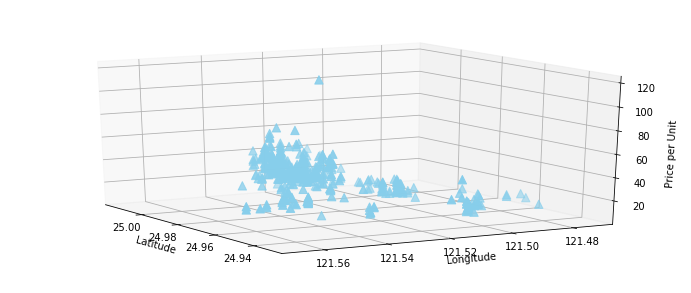

In [69]:
#Plotting
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(12,5))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x5,x6,y,c='skyblue',marker='^',s=70)
ax.set_xlabel('Latitude');ax.set_ylabel('Longitude');ax.set_zlabel('Price per Unit')
ax.view_init(18, 150)

The inputs X5 and X6 are highly correlated because they both represent a geographical location in the city of taiwan. However looking at the 3D plot, it is very hard visualize a pattern or relation between a geographical location and the price of the house as all the points are scattered all over the place and they don't have any kind of shape that explain a certains relationship with the dependant variable. These 2 inputs will not be considered for our prediction. 

####  X3 is the most interesting variable and it will be ony feature that will be used to predict the house price. 

### Test and Estimate : 

In [58]:
#Lets get the Slope and Intercept of the regression line
p1 = np.polyfit(x3,y,1)
p1  #Print the Slope and the Intercept

array([-7.26205162e-03,  4.58514271e+01])

Text(0,0.5,'Price per Unit')

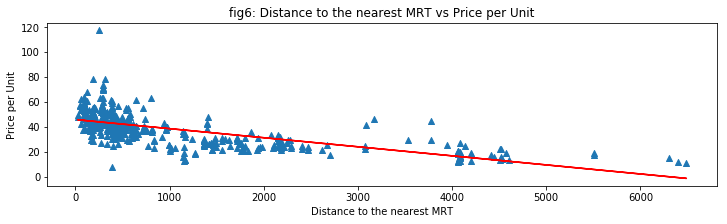

In [59]:
fig = plt.figure(figsize=(12,3))
plt.scatter(x3,y, marker='^')   #Data points
plt.plot(x3,np.polyval(p1, x3),'r-') #Regression line
plt.title('fig6: Distance to the nearest MRT vs Price per Unit');plt.xlabel('Distance to the nearest MRT')
plt.ylabel('Price per Unit')

### Prediction:

In [47]:
#Import Sklearn libraries for our machine learning model 
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import numpy as np 

In [17]:
#We going to use only one feature x3
X = x3 #Lets assign x3 to a new variable X
#Split the data into training/testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [18]:
#Create linear regression object
regr = linear_model.LinearRegression()

In [19]:
#To correct the value error: Reshape the series X_train and y_train to 2d (n_samples, n_features)
X_train = np.array(X_train).reshape(-1,1)
X_test = np.array(X_test).reshape(-1,1)
y_test = np.array(y_test).reshape(-1,1)

In [20]:
#Train the model using the training sets
regr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [21]:
#Make predictions using the testing set
y_pred = regr.predict(X_test)

In [22]:
# The coefficients
print('Coefficients:', regr.coef_)

Coefficients: [-0.00764601]


In [23]:
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))

Mean squared error: 91.68


In [24]:
#Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, y_pred))

Variance score: 0.43


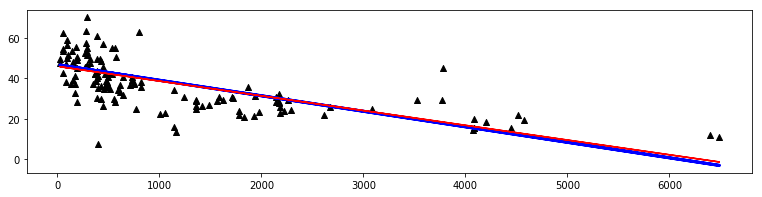

In [64]:
#Plot outputs
fig = plt.figure(figsize=(13,3))
plt.scatter(X_test, y_test, color='black', marker='^')
plt.plot(X_test, y_pred, color='blue', linewidth=3) #Best fit
plt.plot(x3,np.polyval(p1, x3),'r-') #Regression line

## Linear Regression Diagnostic:

Now let’s try to validate the four assumptions

ValueError: x and y must be the same size

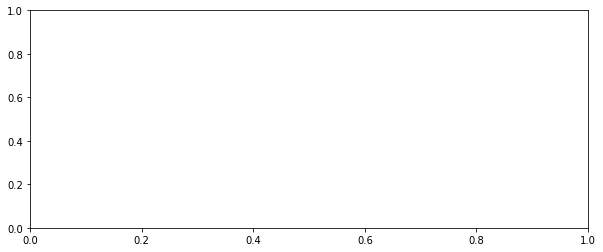

In [96]:
#Residual 
residual = np.array(y_test) - np.array(y_pred)

fig, ax = plt.subplots(figsize=(10,4))
_ = ax.scatter(residual.reshape(-1,1), np.array(y_pred).reshape(-1,1))

In [99]:
residual

array([[ -0.07132917,   2.21212837,   0.54363895, ...,  14.86738746,
          3.36260264,   3.86118543],
       [ -2.87132917,  -0.58787163,  -2.25636105, ...,  12.06738746,
          0.56260264,   1.06118543],
       [  7.02867083,   9.31212837,   7.64363895, ...,  21.96738746,
         10.46260264,  10.96118543],
       ...,
       [-16.77132917, -14.48787163, -16.15636105, ...,  -1.83261254,
        -13.33739736, -12.83881457],
       [-13.67132917, -11.38787163, -13.05636105, ...,   1.26738746,
        -10.23739736,  -9.73881457],
       [ -8.57132917,  -6.28787163,  -7.95636105, ...,   6.36738746,
         -5.13739736,  -4.63881457]])